    Home sale Analysis of Ames Housing Dataset 
    


In [24]:
# importing pandas a,seaborn,matplotlib.pyplot and numpy libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
# Reading the ames csv file
df= pd.read_csv ('ames.csv',index_col=0)

In [26]:
# getting the first 5 rows of the ames csv file
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


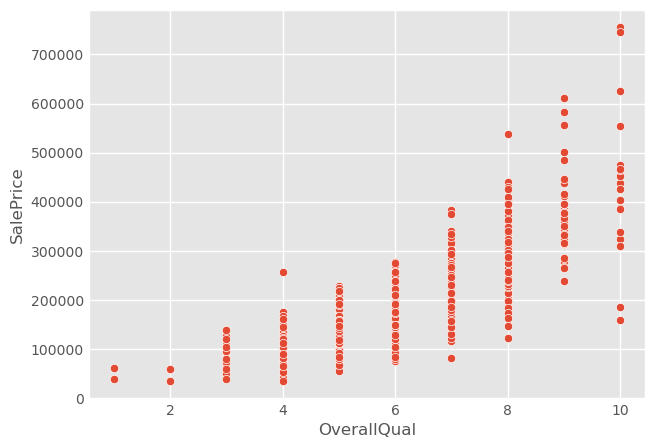

In [37]:
plt.style.use('ggplot')
sns.scatterplot(df,x='OverallQual',y='SalePrice');

In [29]:
import plotly.express as px
# df = px.data.tips()
fig=px.scatter(df,x='OverallQual',y='SalePrice',title='p')
fig.show()

In [7]:
cols=df[['Street','Alley','Utilities']]
cols.set_index('Street')

,Alley,Utilities
Street,,
Pave,NaN,AllPub
Pave,NaN,AllPub
Pave,NaN,AllPub
Pave,NaN,AllPub
Pave,NaN,AllPub
...,...,...
Pave,NaN,AllPub
Pave,NaN,AllPub
Pave,NaN,AllPub


In [8]:
cols.T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
cols.stack().reset_index()

,Id,level_1,0
0,1,Street,Pave
1,1,Utilities,AllPub
2,2,Street,Pave
3,2,Utilities,AllPub
4,3,Street,Pave
...,...,...,...
3006,1458,Utilities,AllPub
3007,1459,Street,Pave
3008,1459,Utilities,AllPub
3009,1460,Street,Pave


In [4]:
# summary of the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [5]:
# store the three columns in the variable df1
df1= df[['SalePrice','TotRmsAbvGrd','OverallCond']]
df1.head()


,SalePrice,TotRmsAbvGrd,OverallCond
Id,,,
1,208500,8,5
2,181500,6,8
3,223500,6,5
4,140000,7,5
5,250000,9,5


In [6]:
# statistical summary of df1
df1.describe()

,SalePrice,TotRmsAbvGrd,OverallCond
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.517808,5.575342
std,79442.502883,1.625393,1.112799
min,34900.000000,2.000000,1.000000
25%,129975.000000,5.000000,5.000000
50%,163000.000000,6.000000,5.000000
75%,214000.000000,7.000000,6.000000
max,755000.000000,14.000000,9.000000


In [7]:
# getting the information about df1 e.g the memory,dtypes,columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   TotRmsAbvGrd  1460 non-null   int64
 2   OverallCond   1460 non-null   int64
dtypes: int64(3)
memory usage: 45.6 KB


Making the visualizations of df1

In [8]:
# find the mean ,median and standard deviation of saleprice
m=np.mean(df['SalePrice'])
med=np.median(df['SalePrice'])
st=df['SalePrice'].std()
print(m)
print(st)
print(med)

180921.19589041095
79442.50288288663
163000.0


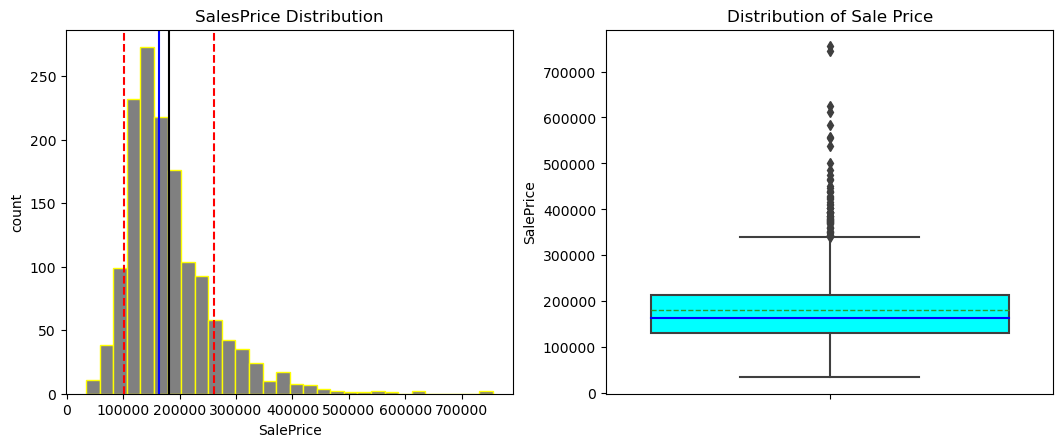

In [9]:
# plotting a histogram showing the distribution of saleprice in terms of mean,median and std
plt.figure(figsize=(15, 8), layout='constrained')
plt.subplot(2,3,1)
plt.hist(data=df1, x='SalePrice', bins=30,color='grey',edgecolor='yellow')
plt.xlabel('SalePrice')
plt.ylabel('count')
plt.axvline(m,color='black')
plt.axvline(med,color='blue')

plt.axvline(m+st, color='red',linestyle='dashed')
plt.axvline(m-st, color='red',linestyle='dashed')
plt.title('SalesPrice Distribution')
# The highest saleprice made is around 755000$
# The lowest saleprice is made is around 34900$


# boxplot showing saleprice distribution
plt.subplot(2,3,2)
sns.boxplot(data=df1,y='SalePrice',showmeans=True,meanline=True,
           boxprops=dict(facecolor='cyan'),medianprops = dict(color = "blue", linewidth = 1.5))
plt.title('Distribution of Sale Price')

plt.show()
# The boxplot shows the median,mean ,the quartiles ,max,min and outliers



In [10]:
# Getting the mean,median and std
# mean=np.mean(df1['OverallCond'])
# median=np.median(df1['OverallCond'])
# Std=df1['OverallCond'].std()

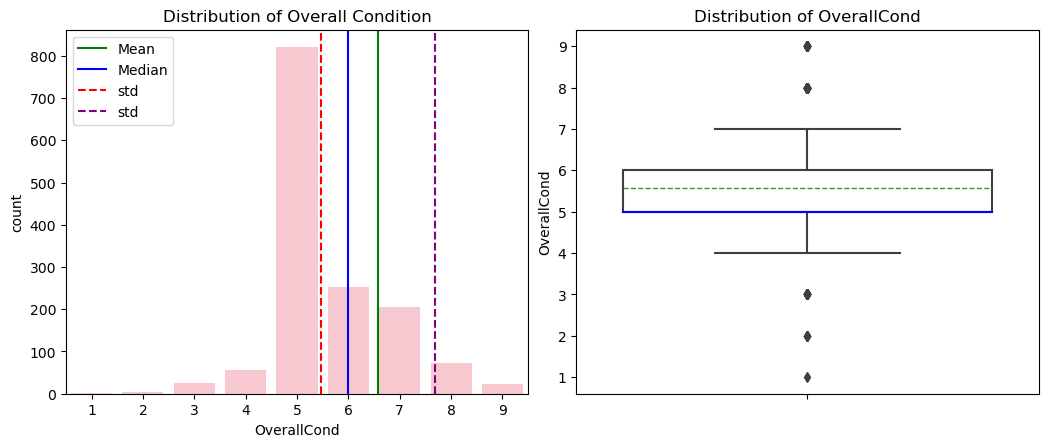

In [11]:
# plotting a histogram showing the distribution of OverallCond in terms of mean,median and std
plt.figure(figsize=(15, 8), layout='constrained')
plt.subplot(2,3,1)

# getting the mean ,mean and std to visualize them in the count plot
mean=np.mean(df1['OverallCond'])
median=np.median(df1['OverallCond'])
Std=df['OverallCond'].std()
# plt.subplot(3,2,5)
sns.countplot(data=df1, x='OverallCond', color='pink')
plt.title('Distribution of Overall Condition')
plt.axvline(mean,color='Green',label = 'Mean')
plt.axvline(median,color='blue',label = 'Median')
plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'std')
plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'std')
plt.legend()

# Most houses bought in ames has an overall condition of 5
# Houses with overall condition 1,2,3,9 aare least bought

# boxplot showing saleprice distribution
plt.subplot(2,3,2)
sns.boxplot(data=df1,y='OverallCond',showmeans=True,meanline=True,
           boxprops=dict(facecolor='white'),medianprops = dict(color = "blue", linewidth = 1.5))
plt.title('Distribution of OverallCond')

plt.show()
# The boxplot shows the median,mean ,the quartiles ,max,min and outliers of overall conditions



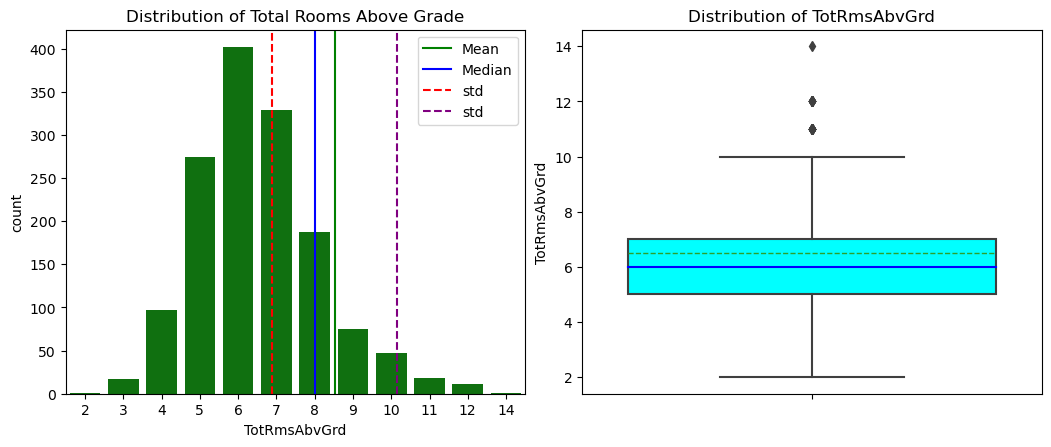

In [12]:
# Visualize TotRmAbvGrd distribution
mean=np.mean(df1['TotRmsAbvGrd'])
median=np.median(df1['TotRmsAbvGrd'])
Std=df1['TotRmsAbvGrd'].std()

plt.figure(figsize=(15, 8), layout='constrained')
plt.subplot(2,3,1)
sns.countplot(data=df1, x='TotRmsAbvGrd', color='green')
plt.title('Distribution of Total Rooms Above Grade')
plt.axvline(mean,color='Green',label = 'Mean')
plt.axvline(median,color='blue',label = 'Median')
plt.axvline(mean-Std, color='red',linestyle='dashed', label = 'std')
plt.axvline(mean+Std, color='purple',linestyle='dashed' ,label = 'std')
plt.legend()
# most houses sold in ames have total rooms above grade of 6 then 7
# Houaes with total rooms above grade  2,14,12


plt.subplot(2,3,2)
sns.boxplot(data=df1,y='TotRmsAbvGrd',showmeans=True,meanline=True,
           boxprops=dict(facecolor='cyan'),medianprops = dict(color = "blue", linewidth = 1.5))
plt.title('Distribution of TotRmsAbvGrd');


Separating df1 into subsets

In [13]:
# separate df into subsets based on overall condition
below_average_condition=df1[df1['OverallCond']<5]
average_condition=df1[df1['OverallCond']==5]
above_average_condition = df1[df1['OverallCond']>5]

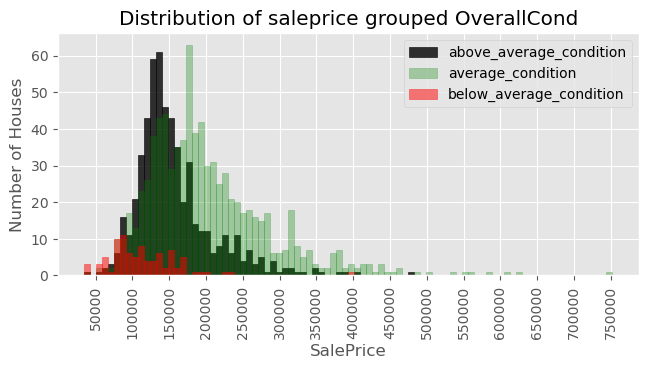

In [14]:
# Visualization of the average,above and below overall conditions in a single plot
# use ggplot style
plt.style.use('ggplot')

# plot one figure
plt.figure(figsize=(18,6), layout='constrained')
plt.subplot(2,3,1)

# Create custom bins so all are on the same scale
bins = range(df1["SalePrice"].min(), df1["SalePrice"].max(), int(df1["SalePrice"].median()) // 20) # Plot three histograms, with reduced opacity (alpha) so 

# the three histograms will overlap
plt.hist( x=above_average_condition['SalePrice'],bins=bins, color='black',alpha=0.8,edgecolor='black')
plt.hist( x=average_condition['SalePrice'],bins=bins,color='green',alpha=0.3,edgecolor='green')
plt.hist( x=below_average_condition['SalePrice'],bins=bins, color='red',alpha=0.5,edgecolor='red')
plt.title('Distribution of saleprice grouped OverallCond')
plt.xlabel('SalePrice')
plt.ylabel('Number of Houses')

# set the legend 
plt.legend(['above_average_condition','average_condition','below_average_condition'])

# set the xticks
xticks = np.arange(50000, 800000, 50000)
plt.xticks(xticks)

plt.xticks(rotation=90)

plt.show()


# Most sales is made from average condition which is equal to 5
# least sales is made from below_average_condition which is below 5

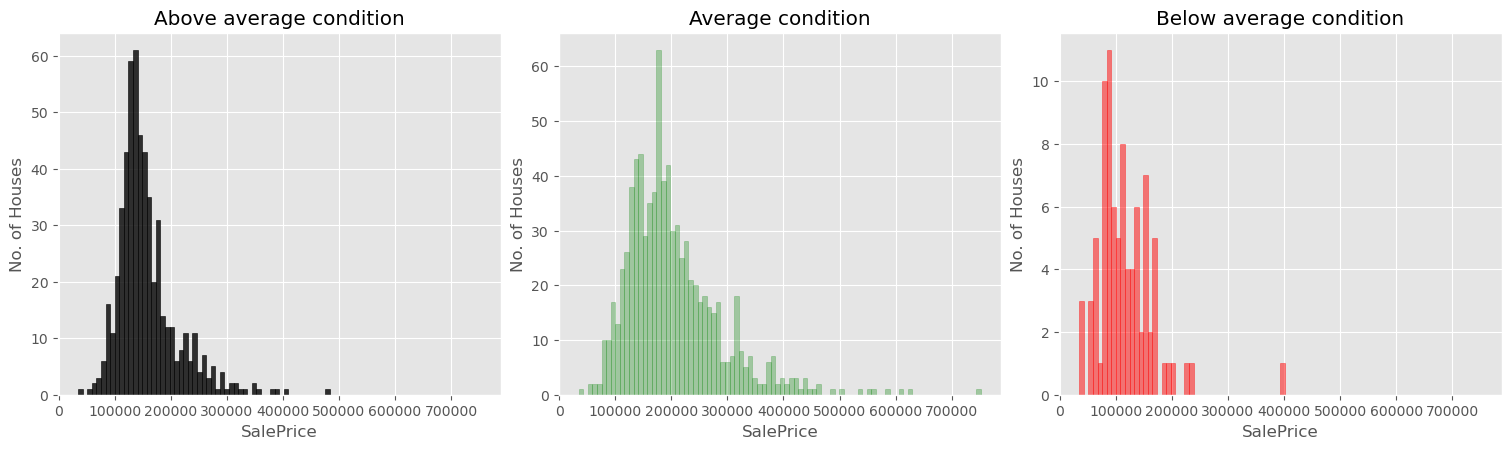

In [15]:
# plot one figure
plt.figure(figsize=(15, 8), layout='constrained')

# visualize above average condition subset
# subplot one shows how above average condition impacts saleprice
plt.subplot(2,3,1)
plt.hist( x=above_average_condition['SalePrice'],bins=bins, color='black',alpha=0.8,edgecolor='black')
plt.ylabel('No. of Houses')
plt.xlabel('SalePrice')
plt.title('Above average condition')

# visualize average condition subset
# subplot to shows how average condition impacts saleprice
plt.subplot(2,3,2)
plt.hist( x=average_condition['SalePrice'],bins=bins,color='green',alpha=0.3,edgecolor='green')
plt.ylabel('No. of Houses')
plt.xlabel('SalePrice')
plt.title('Average condition')

# visualize below average condition subset
# subplot three shows how below average condition impacts saleprice

plt.subplot(2,3,3)
plt.hist( x=below_average_condition['SalePrice'],bins=bins, color='red',alpha=0.5,edgecolor='red')
plt.ylabel('No. of Houses')
plt.xlabel('SalePrice')
plt.title('Below average condition')
plt.show()

# Most saleprice is gotten from houses with average condition
# The amount of saleprice from the houses with below average condition is the least


Explore correlations

In [16]:
# Filter numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]

In [17]:
# getting the correlation of numerical columns
corr=numeric_df.corr()


In [18]:
correlation_data = numeric_df.corr()
strongest_positive_corr = corr['SalePrice'].sort_values(ascending=False).head(5)
strongest_negative_corr = corr['SalePrice'].sort_values(ascending=True).head(5)

plt.tight_layout()
print('Strongest +ve Corr:')
print(strongest_positive_corr )
print(f'Strong negative corr')
print(strongest_negative_corr)
plt.show()

Strongest +ve Corr:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
Strong negative corr
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64


<Figure size 640x480 with 0 Axes>

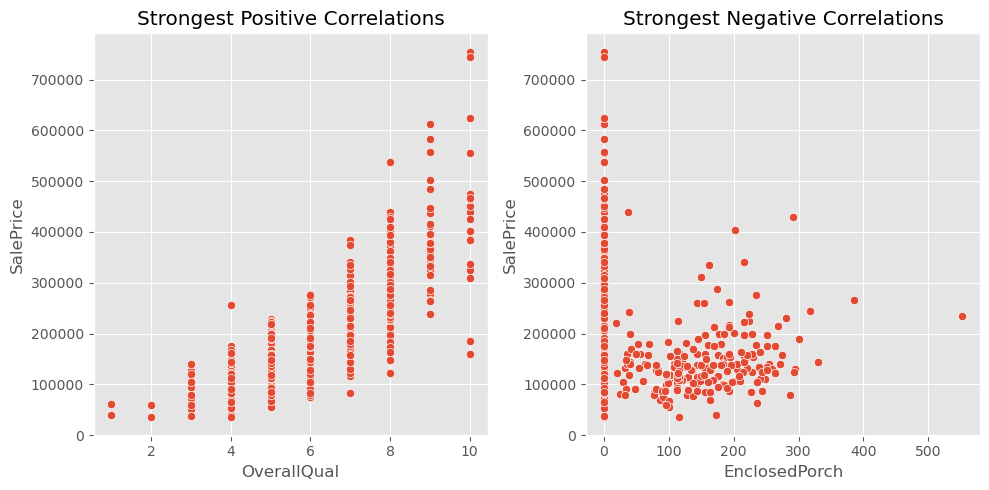

In [19]:

# Find features with the strongest positive and negative correlations with SalePrice
strongest_positive_corr =corr['SalePrice'].sort_values(ascending=False).head(2)
strongest_negative_corr =corr['SalePrice'].sort_values(ascending=True).head(2)

# Extract feature names
positive_corr_features = strongest_positive_corr.index.values[1:]  
negative_corr_features = strongest_negative_corr.index.values[1:] 

# Visualize relationships
plt.figure(figsize=(10, 5))

# Strongest positive correlation
plt.subplot(1, 2, 1)
for feature in positive_corr_features:
    sns.scatterplot(x=feature, y='SalePrice', data=numeric_df)
plt.title('Strongest Positive Correlations')

# Strongest negative correlation
plt.subplot(1, 2, 2)
for feature in negative_corr_features:
    sns.scatterplot(x=feature, y='SalePrice', data=numeric_df)
plt.title('Strongest Negative Correlations')

plt.tight_layout()
plt.show()

Heatmap

Exploring a new feature age

In [20]:
# Years when the homes were sold
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

In [21]:
# creating a new feature age
df['Age']=df['YrSold'] - df['YearBuilt']
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69


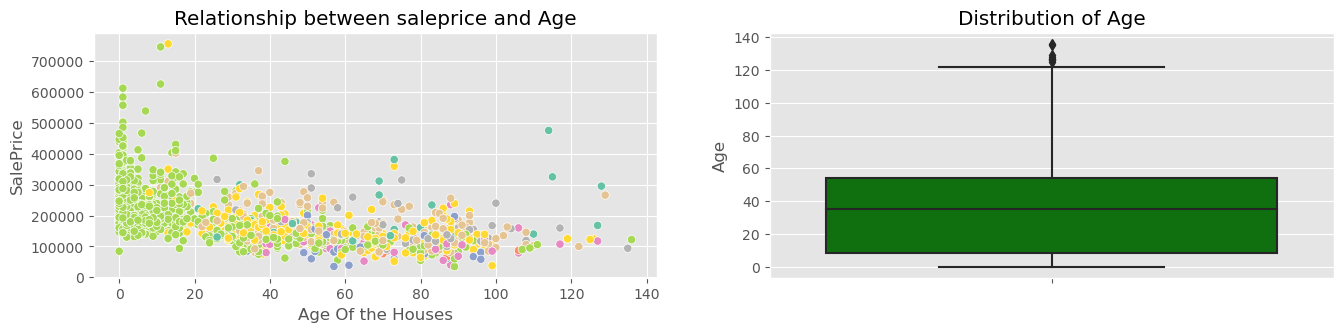

In [22]:
# The relationship btw the new feature age and saleprice
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
scat=sns.scatterplot(y='SalePrice',x='Age',data=df,legend=False,hue='OverallCond',palette='Set2',alpha=1.0)
scat.set(xlabel='Age Of the Houses')
scat.set_ylabel('SalePrice')
scat.set(title='Relationship between saleprice and Age')
# most saleprice is made from the recent builthouses with age of 0-20years
# The saleprice of Houses of age btw 100-140 is the least
# Most saleprice is made from recently built homes

plt.subplot(2,2,2)
sns.boxplot(y='Age',data=df , color='green')
plt.title('Distribution of Age');

# the boxplot shows the median,maximam,minimum and the quartiles of age

In [23]:
a=df['SalePrice'].corr(df['Age'])
a
# the correlation btw age and saleprice is moderate negative correlation

-0.5233504175468161

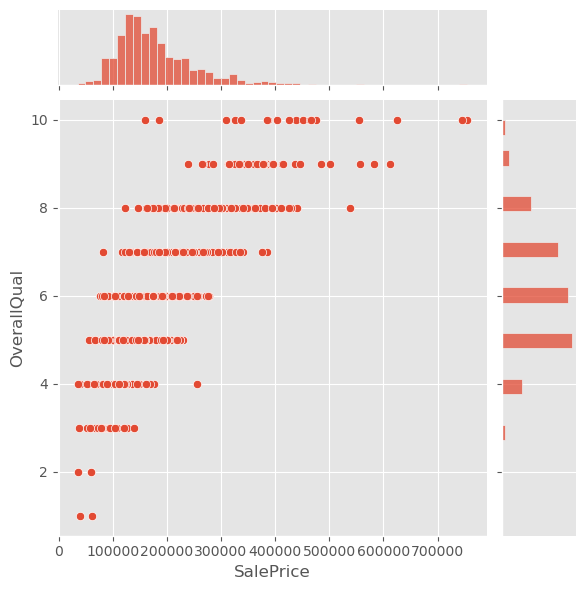

In [28]:
# plt.style.use('fivethirtyeight')
sns.jointplot(x='SalePrice',y='OverallQual',data=df);

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


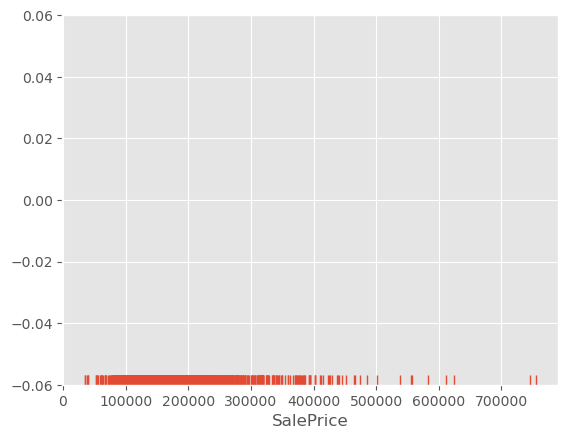

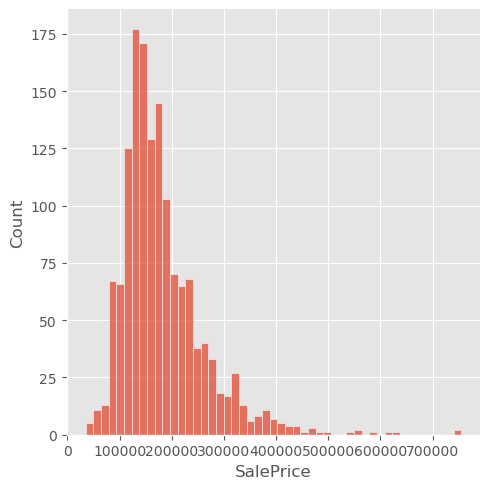

In [35]:
sns.rugplot(df['SalePrice']);
sns.displot(df['SalePrice'],kde=True);